# Importing data


In [1]:

import os
import pandas as pd

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# 2. Path to the target folder on Google Drive
folder_path = "/content/drive/MyDrive/Berlin_police_reports/berlin_reports_yearly_classified/"

In [4]:
# 3. List all files in the folder
files = os.listdir(folder_path)
print("Files found:", files)

Files found: ['berlin_polizei_2014_classified.csv', 'berlin_polizei_2016_classified.csv', 'berlin_polizei_2015_classified.csv', 'berlin_polizei_2017_classified.csv', 'berlin_polizei_2018_classified.csv', 'berlin_polizei_2019_classified.csv', 'berlin_polizei_2020_classified.csv', 'berlin_polizei_2021_classified.csv', 'berlin_polizei_2022_classified.csv', 'berlin_polizei_2023_classified.csv', 'berlin_polizei_2024_classified.csv', 'berlin_polizei_2025_classified.csv']


In [5]:
# 4. Load files into a list of DataFrames
dfs = []

for file in files:
    file_path = os.path.join(folder_path, file)

    # check file extension
    if file.endswith(".csv"):
        df = pd.read_csv(file_path)
        dfs.append(df)
    elif file.endswith(".xlsx") or file.endswith(".xls"):
        df = pd.read_excel(file_path)
        dfs.append(df)
    else:
        print(f"Skipping file: {file}")

In [6]:

# 5. Concatenate all DataFrames into one
if dfs:
    final_df = pd.concat(dfs, ignore_index=True)
    print("Final DataFrame shape:", final_df.shape)
else:
    print("No CSV/XLSX files found in the folder.")




Final DataFrame shape: (13424, 7)


In [7]:
# 6. Preview the combined DataFrame
final_df.head()

,date,title,link,location,description,en_title,kategorie
0,05.11.2014 12:15 Uhr,"Totes Baby vom Weichselplatz - 5.000,- Euro Be...",https://www.berlin.de/polizei/polizeimeldungen...,Ereignisort:Neukölln,Der Fall des am 14. Oktober 2014 in einer Grün...,"Dead baby from Weichselplatz - 5,000 Euro rewa...",Sonstiges
1,15.10.2014 10:17 Uhr,Toter Säugling – Polizei sucht Zeugen (Nr. 2413),https://www.berlin.de/polizei/polizeimeldungen...,Ereignisort:Neukölln,Der in der Nacht zum 14. Oktober 2014 in einer...,Dead Infant – Police Looking for Witnesses (No...,Sonstiges
2,17.07.2014 14:32 Uhr,72-Jähriger vermisst (Nr. 1681),https://www.berlin.de/polizei/polizeimeldungen...,Ereignisort:Neukölln,"Vermisst wird seit Montag, den 14.07.2014, der...",72-year-old missing (No. 1681),Sonstiges
3,15.12.2016 09:50 Uhr,Ungelöster Mordfall aus dem Jahr 1997 - Mordko...,https://www.berlin.de/polizei/polizeimeldungen...,Ereignisort:Mitte,Nr. 3054\nZu einem 19 Jahre zurückliegenden Mo...,Unresolved murder case from 1997 - Homicide on...,Gewaltverbrechen
4,28.11.2016 09:50 Uhr,Mitglied einer Rockergruppierung erschossen,https://www.berlin.de/polizei/polizeimeldungen...,Ereignisort:Lichtenberg,*Gemeinsame Meldung Polizei und Staatsanwaltsc...,Member of a rocker group shot dead,Gewaltverbrechen


# EDA

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# If your DataFrame is already loaded as `final_df`, we just copy it here
df = final_df.copy()

# --- 1. Basic inspection ---
print("DataFrame shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing values per column:\n", df.isna().sum())
print("\nData types:\n", df.dtypes)

DataFrame shape: (13424, 7)

Columns: ['date', 'title', 'link', 'location', 'description', 'en_title', 'kategorie']

Missing values per column:
 date               0
title              0
link               0
location           0
description       12
en_title       11603
kategorie          0
dtype: int64

Data types:
 date           object
title          object
link           object
location       object
description    object
en_title       object
kategorie      object
dtype: object


In [10]:
# --- 2. Convert date column ---
# Dates in format like: "05.11.2014 12:15 Uhr"
df['date_clean'] = pd.to_datetime(df['date'].str.replace(" Uhr", ""), format="%d.%m.%Y %H:%M", errors="coerce")

# Extract year and month for analysis
df['year'] = df['date_clean'].dt.year
df['month'] = df['date_clean'].dt.month

In [11]:
# --- 3. Quick overview ---
print("\nNumber of unique categories:", df['kategorie'].nunique())
print("Categories:", df['kategorie'].unique())

print("\nTop 10 locations:\n", df['location'].value_counts().head(10))



Number of unique categories: 7
Categories: ['Sonstiges' 'Gewaltverbrechen' 'Eigentumsdelikte' 'Verkehrsdelikte'
 'Öffentliche Ordnung' 'Brandstiftung' 'Betäubungsmittel']

Top 10 locations:
 location
Ereignisort:Mitte                         1981
Ereignisort:Friedrichshain-Kreuzberg      1416
Ereignisort:Neukölln                      1207
Ereignisort:Charlottenburg-Wilmersdorf    1191
Ereignisort:Tempelhof-Schöneberg           990
Ereignisort:Pankow                         967
Ereignisort:Lichtenberg                    861
Ereignisort:Treptow-Köpenick               820
Ereignisort:Spandau                        811
Ereignisort:Marzahn-Hellersdorf            785
Name: count, dtype: int64


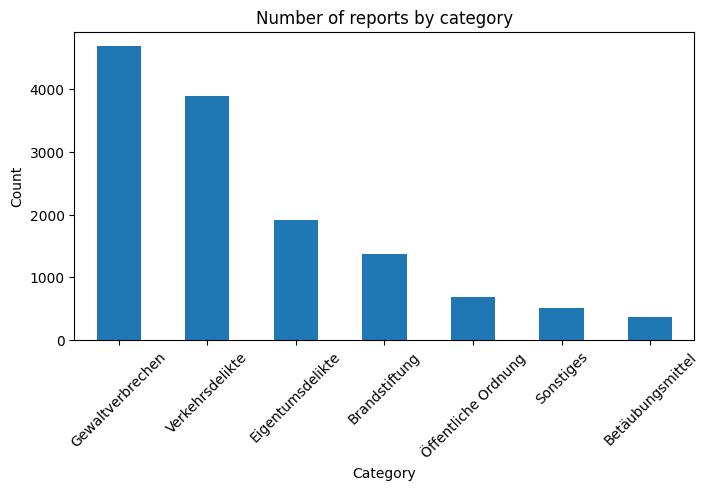

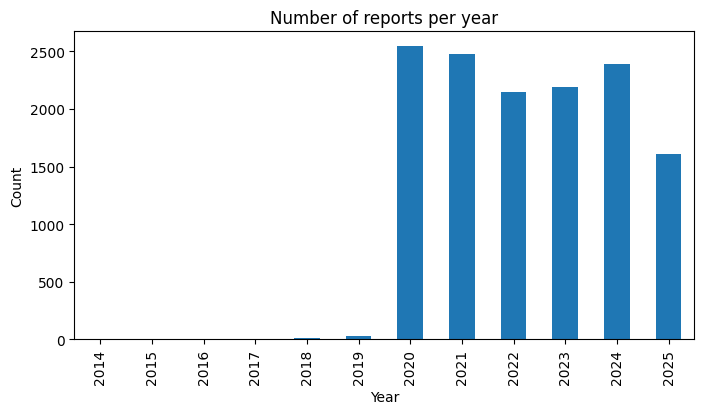

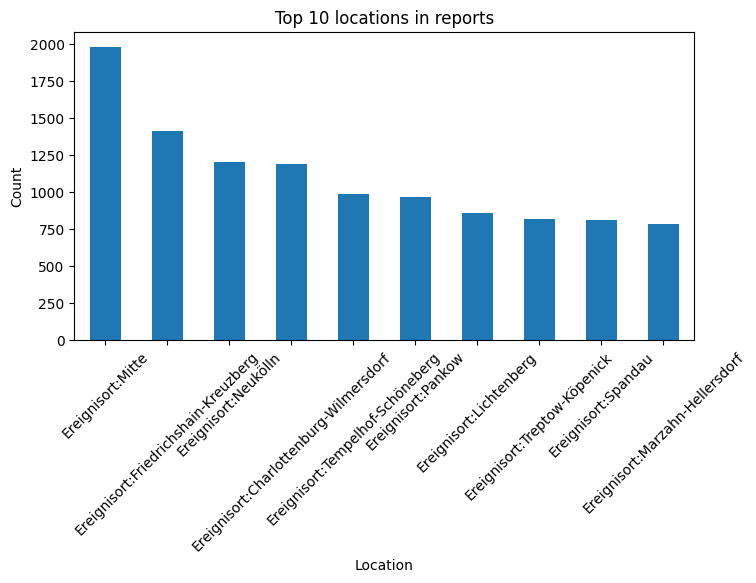

In [12]:
# --- 4. Plots ---

# Category distribution
df['kategorie'].value_counts().plot(kind="bar", figsize=(8,4))
plt.title("Number of reports by category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Reports per year
df['year'].value_counts().sort_index().plot(kind="bar", figsize=(8,4))
plt.title("Number of reports per year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

# Top 10 locations
df['location'].value_counts().head(10).plot(kind="bar", figsize=(8,4))
plt.title("Top 10 locations in reports")
plt.xlabel("Location")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [13]:
df.head()

,date,title,link,location,description,en_title,kategorie,date_clean,year,month
0,05.11.2014 12:15 Uhr,"Totes Baby vom Weichselplatz - 5.000,- Euro Be...",https://www.berlin.de/polizei/polizeimeldungen...,Ereignisort:Neukölln,Der Fall des am 14. Oktober 2014 in einer Grün...,"Dead baby from Weichselplatz - 5,000 Euro rewa...",Sonstiges,2014-11-05 12:15:00,2014,11
1,15.10.2014 10:17 Uhr,Toter Säugling – Polizei sucht Zeugen (Nr. 2413),https://www.berlin.de/polizei/polizeimeldungen...,Ereignisort:Neukölln,Der in der Nacht zum 14. Oktober 2014 in einer...,Dead Infant – Police Looking for Witnesses (No...,Sonstiges,2014-10-15 10:17:00,2014,10
2,17.07.2014 14:32 Uhr,72-Jähriger vermisst (Nr. 1681),https://www.berlin.de/polizei/polizeimeldungen...,Ereignisort:Neukölln,"Vermisst wird seit Montag, den 14.07.2014, der...",72-year-old missing (No. 1681),Sonstiges,2014-07-17 14:32:00,2014,7
3,15.12.2016 09:50 Uhr,Ungelöster Mordfall aus dem Jahr 1997 - Mordko...,https://www.berlin.de/polizei/polizeimeldungen...,Ereignisort:Mitte,Nr. 3054\nZu einem 19 Jahre zurückliegenden Mo...,Unresolved murder case from 1997 - Homicide on...,Gewaltverbrechen,2016-12-15 09:50:00,2016,12
4,28.11.2016 09:50 Uhr,Mitglied einer Rockergruppierung erschossen,https://www.berlin.de/polizei/polizeimeldungen...,Ereignisort:Lichtenberg,*Gemeinsame Meldung Polizei und Staatsanwaltsc...,Member of a rocker group shot dead,Gewaltverbrechen,2016-11-28 09:50:00,2016,11


# Data preparation

In [14]:
import pandas as pd

# Copy original DataFrame
df_clean = final_df.copy()

In [15]:
# --- 1. Parse and extract date features ---
df_clean['date_clean'] = pd.to_datetime(
    df_clean['date'].str.replace(" Uhr", ""),
    format="%d.%m.%Y %H:%M",
    errors="coerce"
)
df_clean['year'] = df_clean['date_clean'].dt.year
df_clean['month'] = df_clean['date_clean'].dt.month
df_clean['day'] = df_clean['date_clean'].dt.day

In [16]:
# --- 2. Clean 'location' column ---
df_clean['location'] = df_clean['location'].str.replace("Ereignisort:", "", regex=False).str.strip()

In [17]:
# --- 3. Standardize categories ---
df_clean['kategorie'] = df_clean['kategorie'].str.strip()
df_clean['kategorie'] = df_clean['kategorie'].replace({
    "Gewaltverbreche": "Gewaltverbrechen"   # fix typo
})

In [18]:
# --- 4. Clean text columns ---
text_cols = ['title', 'description', 'en_title']
for col in text_cols:
    df_clean[col] = df_clean[col].str.replace(r"[\n\r\t*]", " ", regex=True).str.strip()

In [19]:
# --- 5. Remove duplicates ---
df_clean = df_clean.drop_duplicates()

In [20]:
# --- 6. Reset index ---
df_clean = df_clean.reset_index(drop=True)

print("DataFrame after cleaning:", df_clean.shape)
print("\nSample:")
print(df_clean.head(3))


DataFrame after cleaning: (13423, 11)

Sample:
                   date                                              title  \
0  05.11.2014 12:15 Uhr  Totes Baby vom Weichselplatz - 5.000,- Euro Be...   
1  15.10.2014 10:17 Uhr   Toter Säugling – Polizei sucht Zeugen (Nr. 2413)   
2  17.07.2014 14:32 Uhr                    72-Jähriger vermisst (Nr. 1681)   

                                                link  location  \
0  https://www.berlin.de/polizei/polizeimeldungen...  Neukölln   
1  https://www.berlin.de/polizei/polizeimeldungen...  Neukölln   
2  https://www.berlin.de/polizei/polizeimeldungen...  Neukölln   

                                         description  \
0  Der Fall des am 14. Oktober 2014 in einer Grün...   
1  Der in der Nacht zum 14. Oktober 2014 in einer...   
2  Vermisst wird seit Montag, den 14.07.2014, der...   

                                            en_title  kategorie  \
0  Dead baby from Weichselplatz - 5,000 Euro rewa...  Sonstiges   
1  Dead Infant –

In [21]:
df_clean.head()

,date,title,link,location,description,en_title,kategorie,date_clean,year,month,day
0,05.11.2014 12:15 Uhr,"Totes Baby vom Weichselplatz - 5.000,- Euro Be...",https://www.berlin.de/polizei/polizeimeldungen...,Neukölln,Der Fall des am 14. Oktober 2014 in einer Grün...,"Dead baby from Weichselplatz - 5,000 Euro rewa...",Sonstiges,2014-11-05 12:15:00,2014,11,5
1,15.10.2014 10:17 Uhr,Toter Säugling – Polizei sucht Zeugen (Nr. 2413),https://www.berlin.de/polizei/polizeimeldungen...,Neukölln,Der in der Nacht zum 14. Oktober 2014 in einer...,Dead Infant – Police Looking for Witnesses (No...,Sonstiges,2014-10-15 10:17:00,2014,10,15
2,17.07.2014 14:32 Uhr,72-Jähriger vermisst (Nr. 1681),https://www.berlin.de/polizei/polizeimeldungen...,Neukölln,"Vermisst wird seit Montag, den 14.07.2014, der...",72-year-old missing (No. 1681),Sonstiges,2014-07-17 14:32:00,2014,7,17
3,15.12.2016 09:50 Uhr,Ungelöster Mordfall aus dem Jahr 1997 - Mordko...,https://www.berlin.de/polizei/polizeimeldungen...,Mitte,Nr. 3054 Zu einem 19 Jahre zurückliegenden Mor...,Unresolved murder case from 1997 - Homicide on...,Gewaltverbrechen,2016-12-15 09:50:00,2016,12,15
4,28.11.2016 09:50 Uhr,Mitglied einer Rockergruppierung erschossen,https://www.berlin.de/polizei/polizeimeldungen...,Lichtenberg,Gemeinsame Meldung Polizei und Staatsanwaltsch...,Member of a rocker group shot dead,Gewaltverbrechen,2016-11-28 09:50:00,2016,11,28


# Data visualization

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

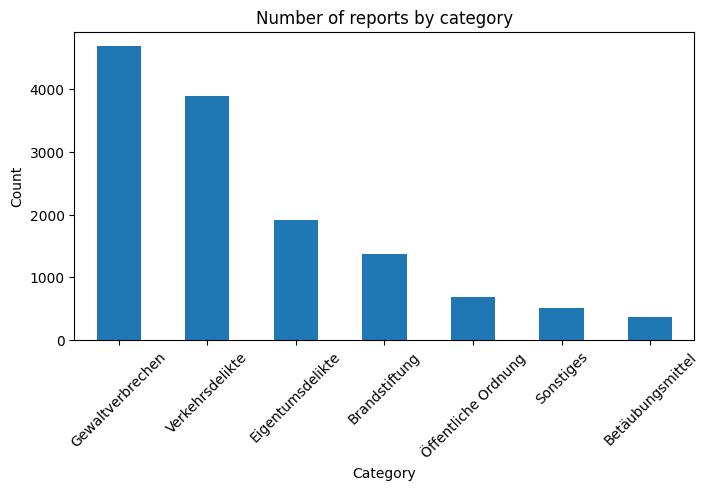

In [22]:
import matplotlib.pyplot as plt

df_clean['kategorie'].value_counts().plot(kind="bar", figsize=(8,4))
plt.title("Number of reports by category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


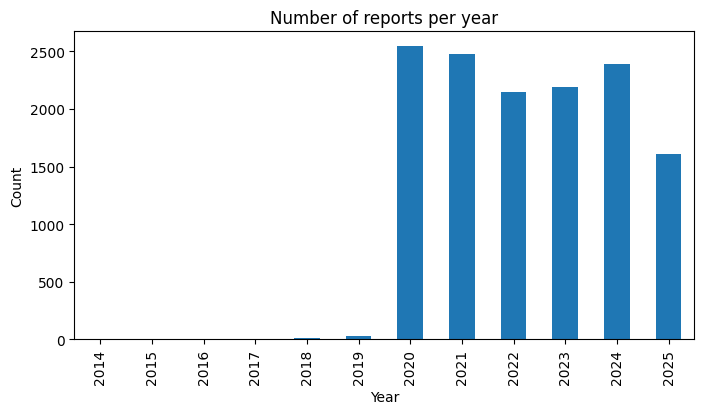

In [23]:
df_clean['year'].value_counts().sort_index().plot(kind="bar", figsize=(8,4))
plt.title("Number of reports per year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


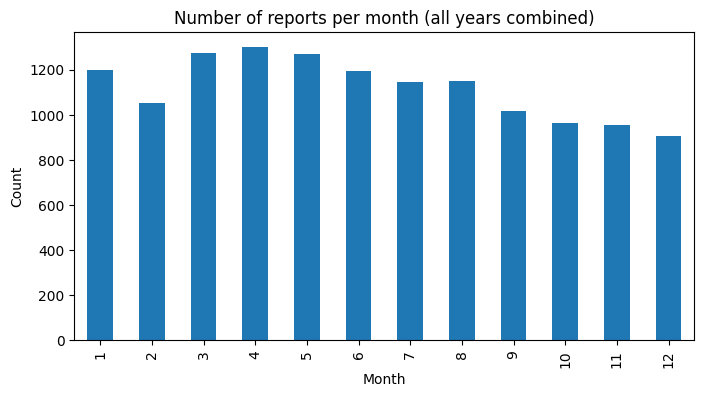

In [24]:
df_clean['month'].value_counts().sort_index().plot(kind="bar", figsize=(8,4))
plt.title("Number of reports per month (all years combined)")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()


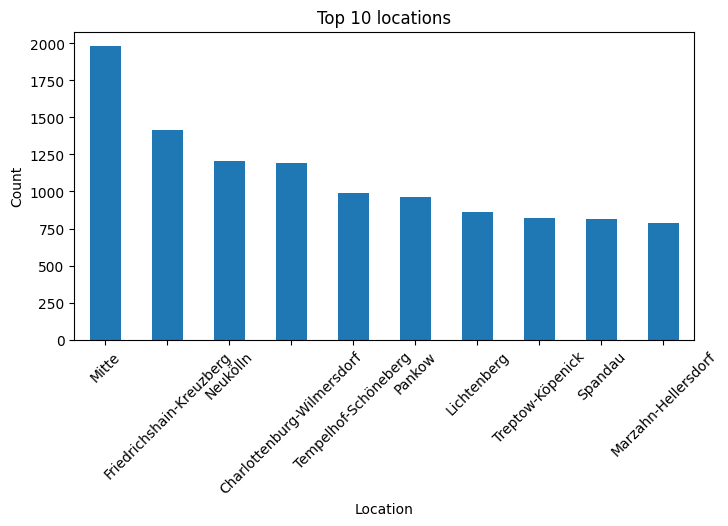

In [25]:
df_clean['location'].value_counts().head(10).plot(kind="bar", figsize=(8,4))
plt.title("Top 10 locations")
plt.xlabel("Location")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-3086294994.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_clean.groupby('date_clean').size().resample("M").sum().plot(figsize=(12,5))


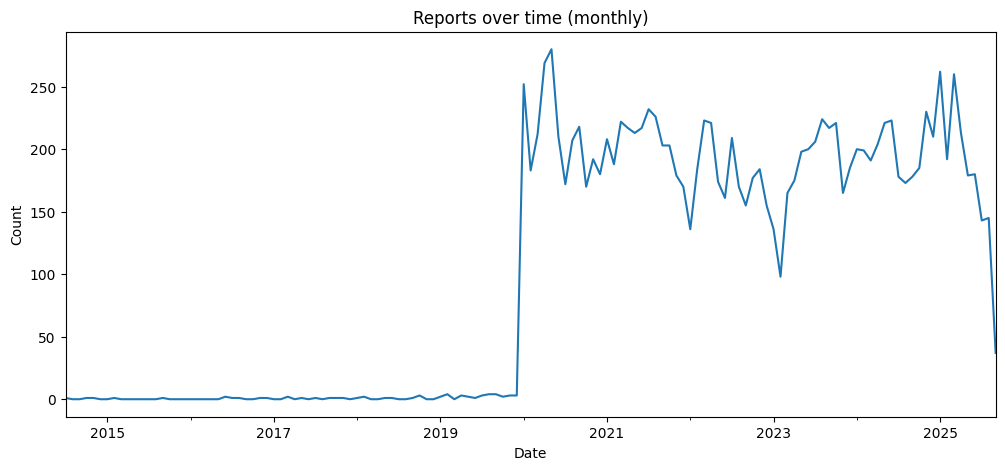

In [26]:
df_clean.groupby('date_clean').size().resample("M").sum().plot(figsize=(12,5))
plt.title("Reports over time (monthly)")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

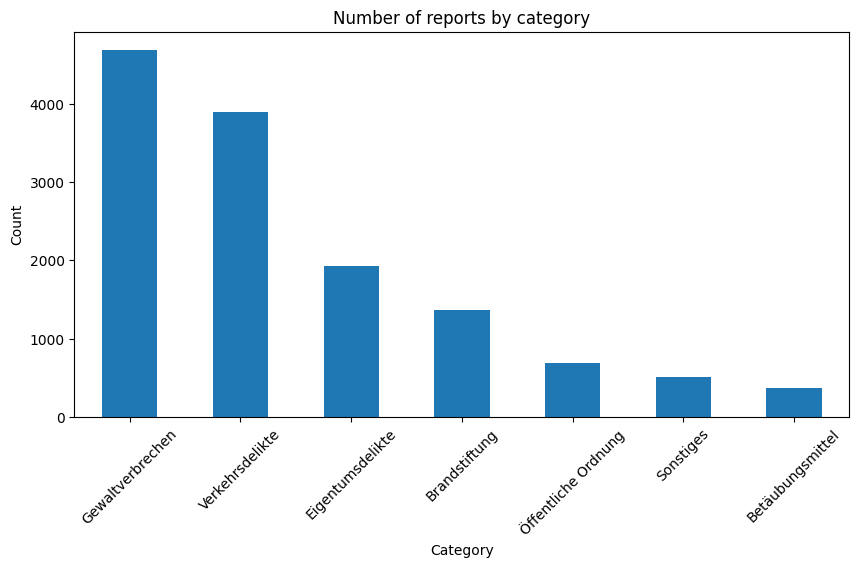

In [27]:
# 1. Distribution of categories
plt.figure(figsize=(10,5))
df_clean['kategorie'].value_counts().plot(kind="bar")
plt.title("Number of reports by category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

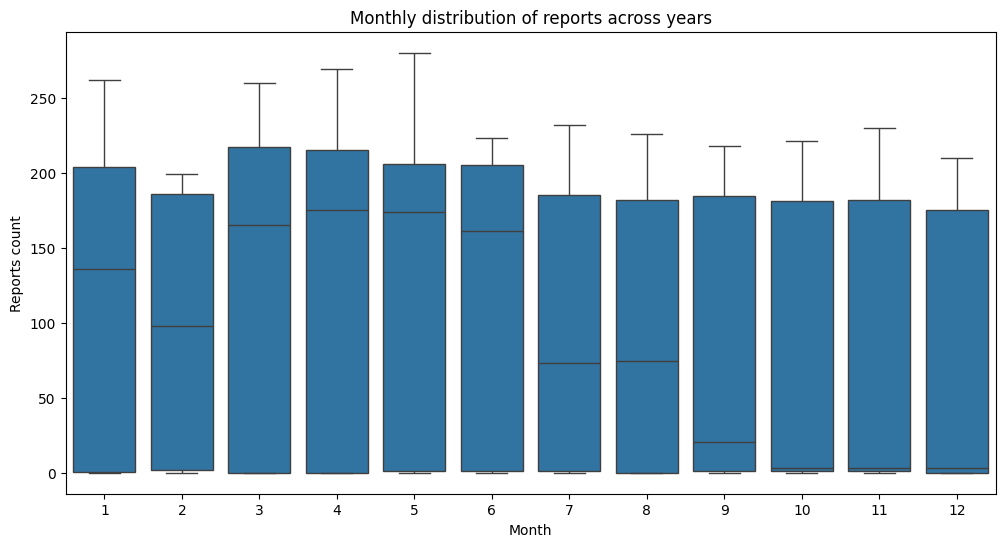

In [34]:
df_clean_monthly = df_clean.set_index('date_clean').sort_index()

monthly_counts = df_clean_monthly.resample("ME").size().reset_index(name="count")
monthly_counts['year'] = monthly_counts['date_clean'].dt.year
monthly_counts['month'] = monthly_counts['date_clean'].dt.month

plt.figure(figsize=(12,6))
sns.boxplot(data=monthly_counts, x="month", y="count")
plt.title("Monthly distribution of reports across years")
plt.xlabel("Month")
plt.ylabel("Reports count")
plt.show()

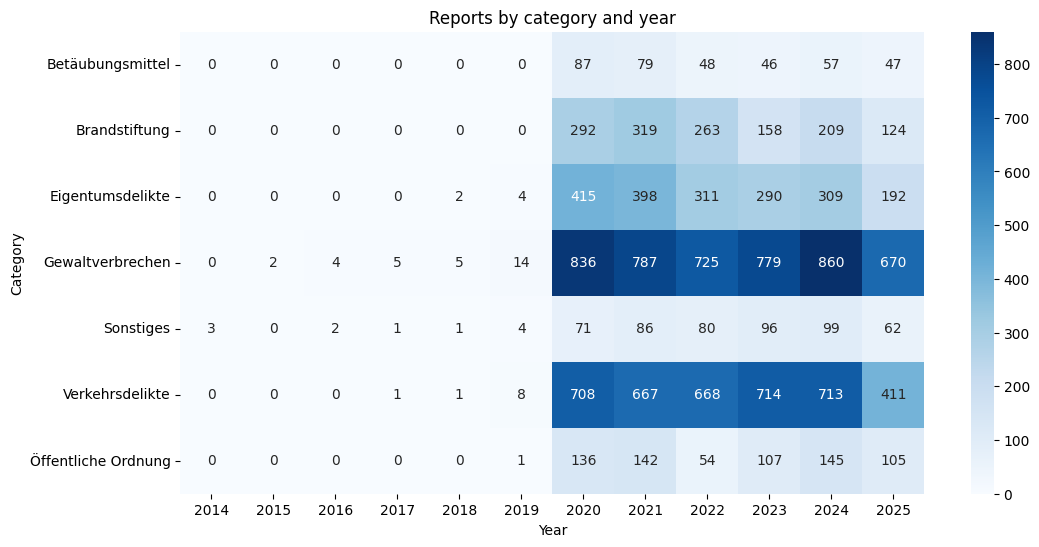

In [31]:
# 7. Category vs Year (heatmap)
cat_year = df_clean.groupby(['year', 'kategorie']).size().unstack(fill_value=0)
plt.figure(figsize=(12,6))
sns.heatmap(cat_year.T, cmap="Blues", annot=True, fmt="d")
plt.title("Reports by category and year")
plt.xlabel("Year")
plt.ylabel("Category")
plt.show()

<Figure size 1200x600 with 0 Axes>

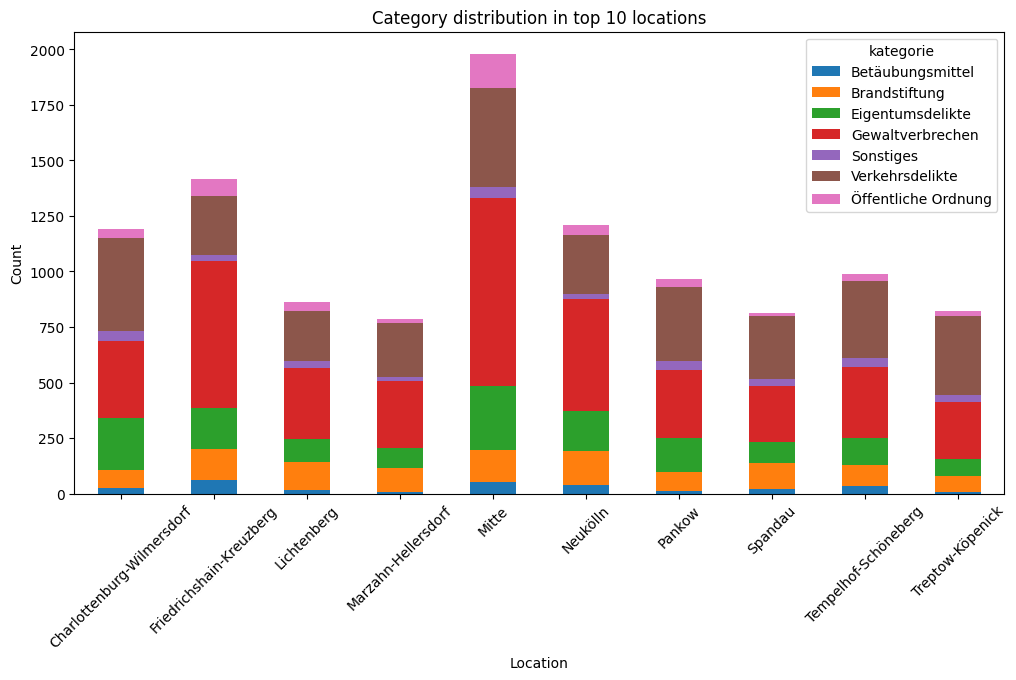

In [35]:
top_locations = df_clean['location'].value_counts().head(10).index
cat_loc = df_clean[df_clean['location'].isin(top_locations)].groupby(['location', 'kategorie']).size().unstack(fill_value=0)

plt.figure(figsize=(12,6))
cat_loc.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Category distribution in top 10 locations")
plt.xlabel("Location")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

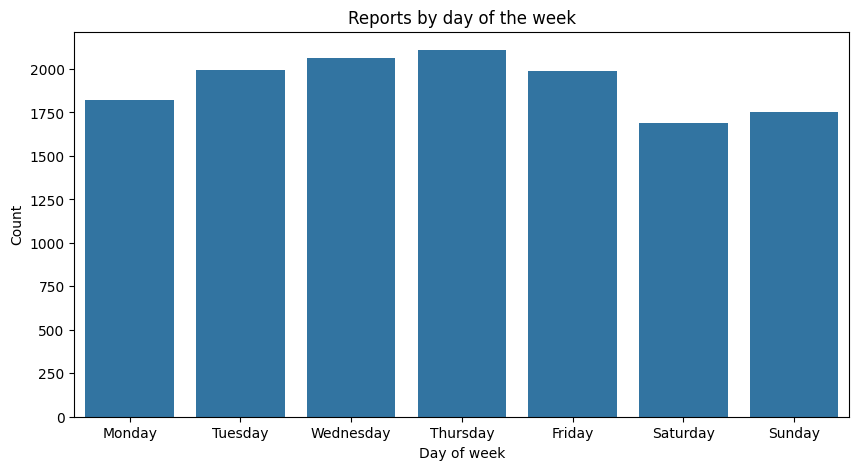

In [51]:
df_clean_dof = df_clean.set_index('date_clean').sort_index()

df_clean_dof['day_of_week'] = df_clean_dof.index.day_name()

plt.figure(figsize=(10,5))
sns.countplot(
    x="day_of_week",
    data=df_clean_dof,
    order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)
plt.title("Reports by day of the week")
plt.xlabel("Day of week")
plt.ylabel("Count")
plt.show()

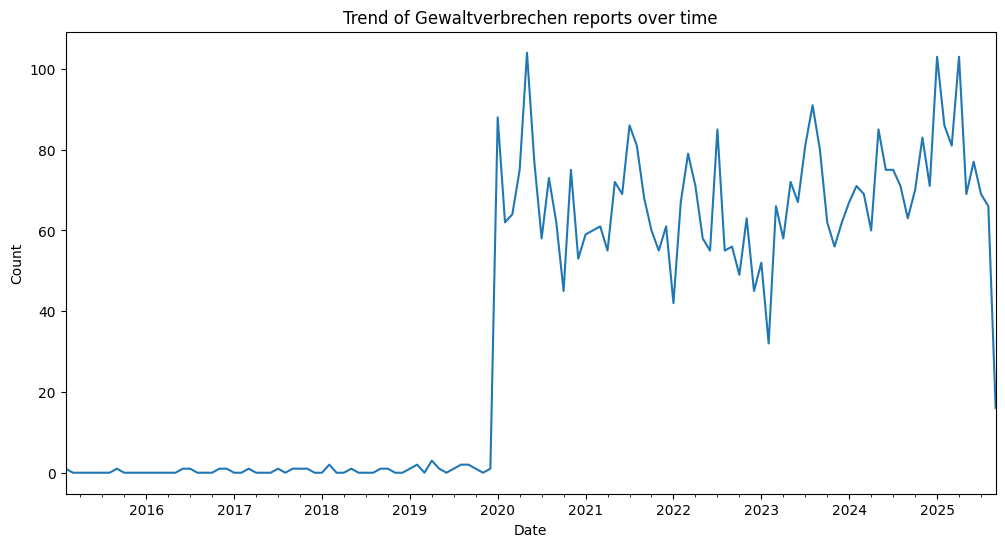

In [39]:
plt.figure(figsize=(12,6))

(df_clean[df_clean['kategorie']=="Gewaltverbrechen"]
    .set_index('date_clean')
    .resample("ME")
    .size()
    .plot())

plt.title("Trend of Gewaltverbrechen reports over time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()


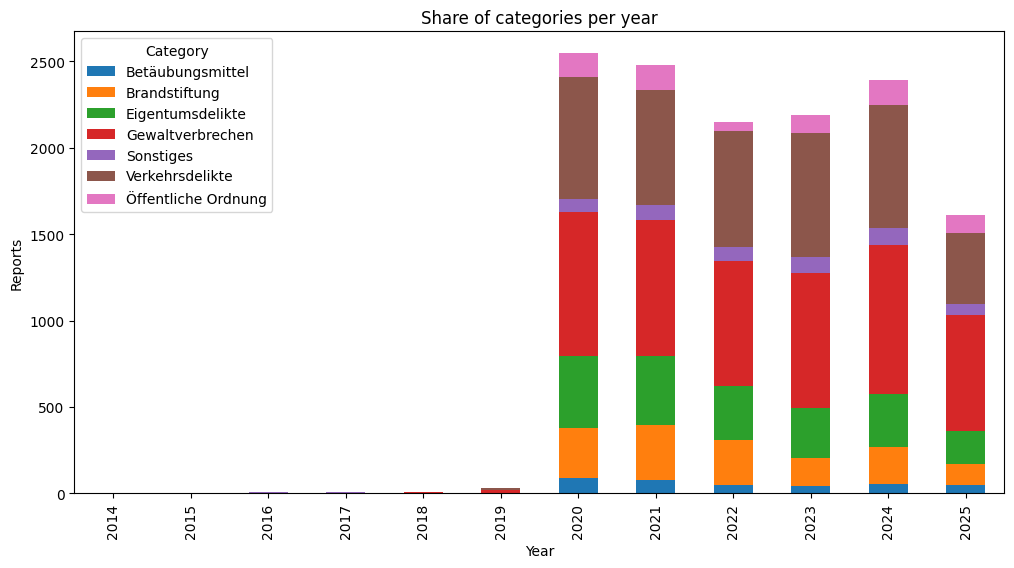

In [40]:
cat_year.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Share of categories per year")
plt.xlabel("Year")
plt.ylabel("Reports")
plt.legend(title="Category")
plt.show()

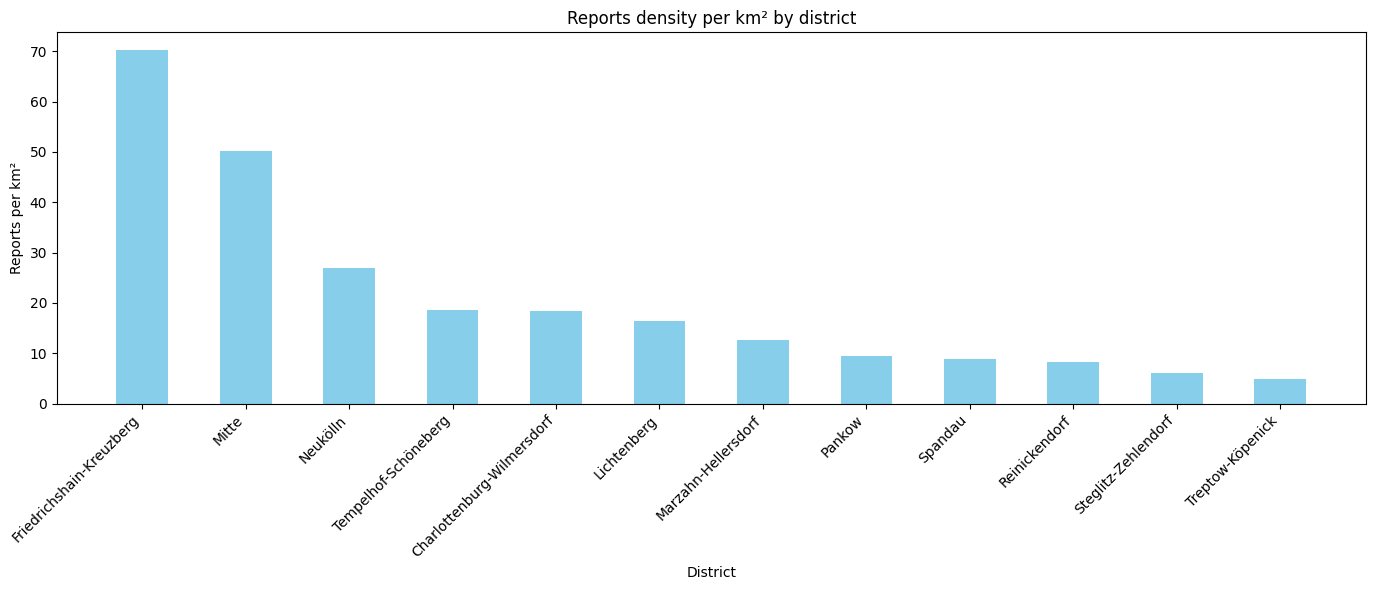

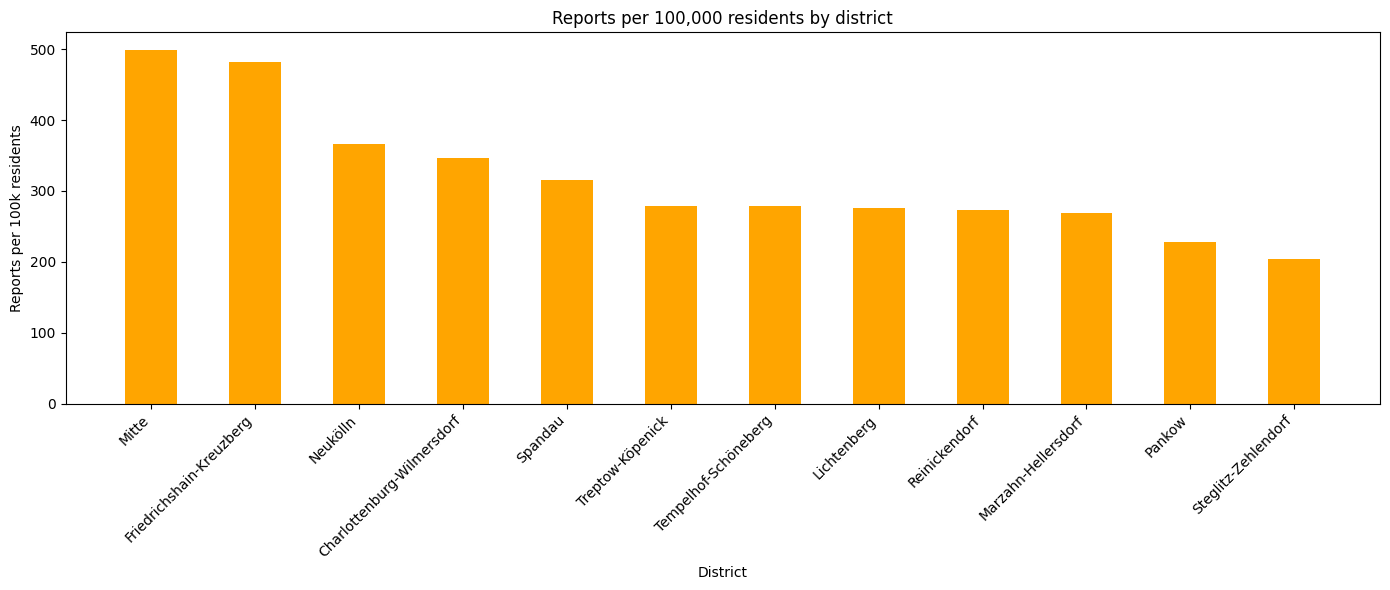

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Region data ---

# 10.09.2025 https://en.wikipedia.org/wiki/Boroughs_and_quarters_of_Berlin
region_data = {
    "Charlottenburg-Wilmersdorf": {"population": 343081, "area_km2": 64.72},
    "Friedrichshain-Kreuzberg": {"population": 293454, "area_km2": 20.16},
    "Lichtenberg": {"population": 311881, "area_km2": 52.29},
    "Marzahn-Hellersdorf": {"population": 291948, "area_km2": 61.74},
    "Mitte": {"population": 397134, "area_km2": 39.47},
    "Neukölln": {"population": 330017, "area_km2": 44.93},
    "Pankow": {"population": 424307, "area_km2": 103.01},
    "Reinickendorf": {"population": 268792, "area_km2": 89.46},
    "Spandau": {"population": 257091, "area_km2": 91.91},
    "Steglitz-Zehlendorf": {"population": 310446, "area_km2": 102.50},
    "Tempelhof-Schöneberg": {"population": 355868, "area_km2": 53.09},
    "Treptow-Köpenick": {"population": 294081, "area_km2": 168.42},
}

region_df = pd.DataFrame(region_data).T.reset_index().rename(columns={"index":"location"})

# --- 2. Count reports per location ---
location_counts = df_clean.groupby("location").size().reset_index(name="reports")

# --- 3. Merge with region data ---
merged = location_counts.merge(region_df, on="location", how="left")

# --- 4. Calculate normalized metrics ---
merged["reports_per_km2"] = merged["reports"] / merged["area_km2"]
merged["reports_per_100k"] = merged["reports"] / merged["population"] * 100000

# --- 5. Plot reports per km² ---
merged_sorted = merged.sort_values("reports_per_km2", ascending=False)

plt.figure(figsize=(14,6))
plt.bar(
    merged_sorted['location'],
    merged_sorted['reports_per_km2'],
    width=0.5,       # smaller width = larger gaps
    color='skyblue'
)
plt.title("Reports density per km² by district")
plt.ylabel("Reports per km²")
plt.xlabel("District")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("")
# --- 6. Plot reports per 100k inhabitants ---
merged_sorted = merged.sort_values("reports_per_100k", ascending=False)

plt.figure(figsize=(14,6))
plt.bar(
    merged_sorted['location'],
    merged_sorted['reports_per_100k'],
    width=0.5,       # smaller width = larger gaps
    color='orange'
)
plt.title("Reports per 100,000 residents by district")
plt.ylabel("Reports per 100k residents")
plt.xlabel("District")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()